<b>Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

<b>Information About Dataset

In [2]:
# Read the Customer Churn Dataset
dataset = pd.read_csv("Dataset_Customer_Churn.csv")

# Display the Data of the Dataset
dataset.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [3]:
# Display the Shape of the Dataset
print(f"Shape of the Dataset is : {dataset.shape}")

Shape of the Dataset is : (7043, 21)


In [4]:
# Find out the Unique Values of each columns
uniqueValues = dataset.nunique()

# Display the each columns unique values
print(f"Here is the Unique Values of Each Columns : \n{uniqueValues}")

Here is the Unique Values of Each Columns : 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
# Check the Missing Values in the Dataset
nanValues = dataset.isnull().sum()

# Display the Missig Values of Each Column
print(f"Here is the Missing Values in the Dataset : \n{nanValues}")

Here is the Missing Values in the Dataset : 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Check the Duplicates Data in the Dataset
duplicateData = dataset.duplicated().sum()

# Display the Total Duplicate Row in the Dataset
print(f"Here is the Total Duplicates Row in the Dataset : {duplicateData}")

Here is the Total Duplicates Row in the Dataset : 0


In [7]:
# Display the Information About Dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Display the Information About Numerical Columns
print(dataset.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
# Handle the Tenure Column
dataset = dataset.drop(dataset[dataset["tenure"] == 0].index)

In [9]:
# Check the Balance/ImBalance Dataset
checkDataset = dataset["Churn"].value_counts()

# Display the Churn Column
print(f"Here is the total each values of Churn Columns : \n{checkDataset}")

Here is the total each values of Churn Columns : 
No     5174
Yes    1869
Name: Churn, dtype: int64


<b>EDA(Exploratory Data Analysis)

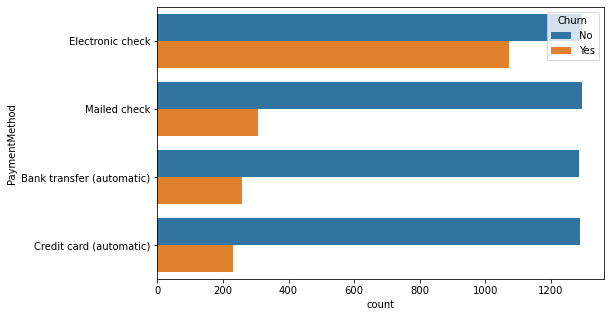

In [77]:
# Display the Relationship with PaymentMethod and Churn
plt.figure(figsize = (8,5))
sns.countplot(y = dataset["PaymentMethod"] , hue = dataset["Churn"]) 
plt.show()

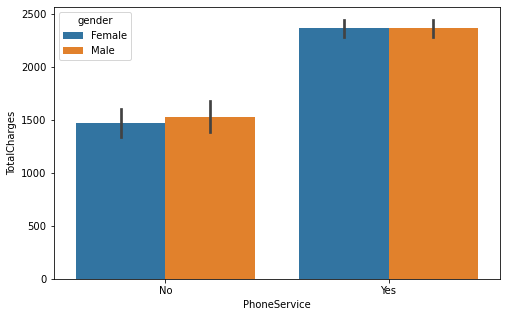

In [56]:
# Display the Relationship with PhoneService and TotalCharges with Gender
plt.figure(figsize = (8,5))
sns.barplot(x = dataset["PhoneService"] , y = pd.to_numeric(dataset["TotalCharges"], errors='coerce')  , hue = dataset["gender"]) 
plt.show()

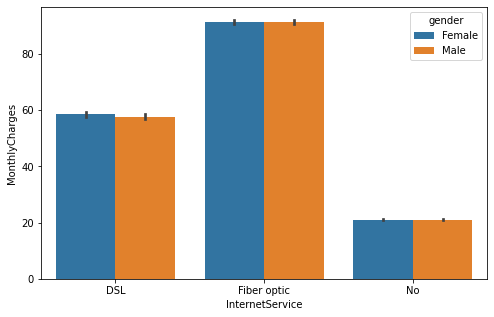

In [62]:
# Display the RelationShip with InternetService and MonthlyCharges with Gender
plt.figure(figsize = (8,5))
sns.barplot(x = dataset["InternetService"] , y = dataset["MonthlyCharges"] , hue = dataset["gender"])
plt.show()

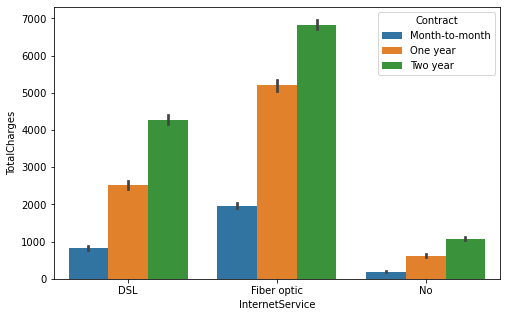

In [68]:
# Display the RelationShip with InternetService and TotalCharges with Contract
plt.figure(figsize = (8,5))
sns.barplot(x = dataset["InternetService"] , y = pd.to_numeric(dataset["TotalCharges"], errors='coerce') , hue = dataset["Contract"])
plt.show()

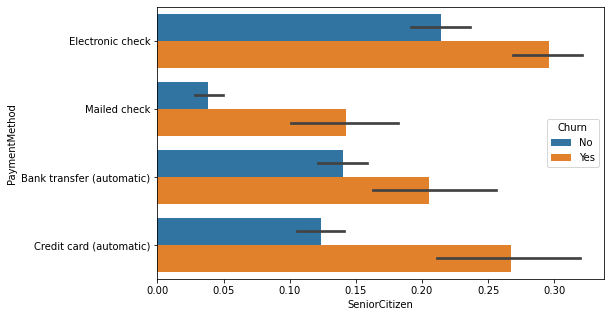

In [71]:
# Display the Relationship with SeniorCitizen and PaymentMethod with Churn
plt.figure(figsize = (8,5))
sns.barplot(x = dataset["SeniorCitizen"] , y = dataset["PaymentMethod"] , hue = dataset["Churn"])
plt.show()

# With ImBalance Dataset

<b>Pre-processing Dataset

In [10]:
# Change the Dtype of TotalCharges Column
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors='coerce') 

In [11]:
# Convert the Datset into Dependent and Independent Matrix
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

# Display the Shape of the Matrixs
print(f"Here is the Shape of X Matrix : {X.shape}")
print(f"Here is the Shape of Y Matrix : {Y.shape}")

Here is the Shape of X Matrix : (7032, 19)
Here is the Shape of Y Matrix : (7032,)


In [12]:
# Convert the Categorical Data into Numerical Data

encoder = LabelEncoder() # Create the Obejct of LabelEncoder

for col_index in range(0,X.shape[1]): 
    if col_index == 1 or col_index == 17 or col_index == 18:
        continue
    X[:,col_index] = encoder.fit_transform(X[:,col_index])

In [13]:
# Convert the Y Matrix into Numerical Form
Y = encoder.fit_transform(Y)

In [14]:
# Normalize the Data of the Dataset

normalize = MinMaxScaler() # Create the Object of MinMaxScaler

X = normalize.fit_transform(X)

<b>Splitting Dataset into Training & Testing

In [15]:
# Split the Dataset into Training and Testing
x_train , x_test , y_train , y_test = train_test_split(X ,Y , test_size = 0.2 , random_state = 42)

# Display the Shapes of the Training and Testing
print(f"Here is the Shape of the X Train is : {x_train.shape}")
print(f"Here is the Shape of the Y Train is : {y_train.shape}")
print(f"Here is the Shape of the X Test  is : {x_test.shape}")
print(f"Here is the Shape of the Y Test  is : {y_test.shape}")

Here is the Shape of the X Train is : (5625, 19)
Here is the Shape of the Y Train is : (5625,)
Here is the Shape of the X Test  is : (1407, 19)
Here is the Shape of the Y Test  is : (1407,)


<b>Machine Learning Models

In [16]:
# Define the Function for the Machine Learning Models
def model_res(model , x_train = x_train , x_test = x_test , y_train = y_train , y_test = y_test):
    
    # Train the Model in the Training Dataset
    model.fit(x_train , y_train)
    
    # Predict the Result in the Testing Dataset
    prediction = model.predict(x_test)
    
    # Calculate the Accuracy of the Model
    accuracy = accuracy_score(y_test , prediction)
    
    # Calculate the Classification Report of the Model
    classReport = classification_report(y_test , prediction)
    
    # Calculate the Confusion Matrix of the Model
    conMatrix = confusion_matrix(y_test , prediction)
    
    # Return the All Results
    return model , prediction , accuracy , classReport , conMatrix

<b>Logistic Regression Model

In [17]:
# Create the Object of the Logistic Regression Model
lrModel = LogisticRegression()

# Call the Function and get the Result 
lrModel , lrPredict , lrAcc , lrReport , lrCon = model_res(lrModel)

In [18]:
# Display the Accuracy of the Logistic Regression
print(f"Here is the Accuracy of the Logistic Regression Model : {lrAcc}")

Here is the Accuracy of the Logistic Regression Model : 0.7860696517412935


In [19]:
# Display the Classification Report of the Logistic Regression
print(f"Here is the Classification Report of the Logistic Regression Model : \n{lrReport}")

Here is the Classification Report of the Logistic Regression Model : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



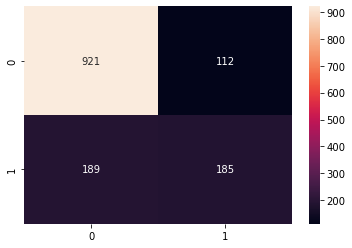

In [72]:
# Display the Confusion Matrix of the Logistic Regression
sns.heatmap(lrCon , annot = True , fmt="g")
plt.show()

<b>Decision Tree Classifier Model

In [21]:
# Create the Object of the Decision Tree Classifier Model
dtModel = DecisionTreeClassifier()

# Call the Function and get the Result 
dtModel , dtPredict , dtAcc , dtReport , dtCon = model_res(dtModel)

In [22]:
# Display the Accuracy of the Decision Tree
print(f"Here is the Accuracy of the Decision Tree Model : {dtAcc}")

Here is the Accuracy of the Decision Tree Model : 0.7213930348258707


In [23]:
# Display the Classification Report of the Decision Tree
print(f"Here is the Classification Report of the Decision Tree Model : \n{dtReport}")

Here is the Classification Report of the Decision Tree Model : 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



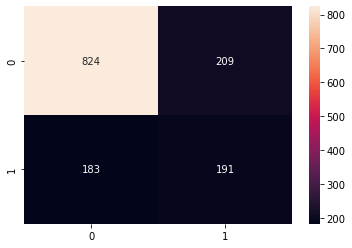

In [73]:
# Display the Confusion Matrix of the Decision Tree
sns.heatmap(dtCon , annot = True , fmt="g")
plt.show()

<b>Random Forest Classifier Model

In [25]:
# Create the Object of the Random Forest Classifier Model
rdModel = RandomForestClassifier()

# Call the Function and get the Result 
rdModel , rdPredict , rdAcc , rdReport , rdCon = model_res(rdModel)

In [26]:
# Display the Accuracy of the Random Forest
print(f"Here is the Accuracy of the Random Forest Model : {rdAcc}")

Here is the Accuracy of the Random Forest Model : 0.7917555081734187


In [27]:
# Display the Classification Report of the Random Forest
print(f"Here is the Classification Report of the Random Forest Model : \n{rdReport}")

Here is the Classification Report of the Random Forest Model : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



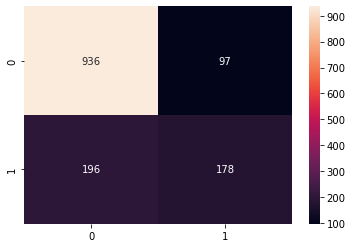

In [74]:
# Display the Confusion Matrix of the Random Forest
sns.heatmap(rdCon , annot = True , fmt="g")
plt.show()

<b>Support Vector Classifier Model

In [29]:
# Create the Object of the Support Vector Classifier Model
svModel = SVC()

# Call the Function and get the Result 
svModel , svPredict , svAcc , svReport , svCon = model_res(svModel)

In [30]:
# Display the Accuracy of the Support Vector
print(f"Here is the Accuracy of the Support Vector Model : {svAcc}")

Here is the Accuracy of the Support Vector Model : 0.7853589196872779


In [31]:
# Display the Classification Report of the Support Vector
print(f"Here is the Classification Report of the Support Vector Model : \n{svReport}")

Here is the Classification Report of the Support Vector Model : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



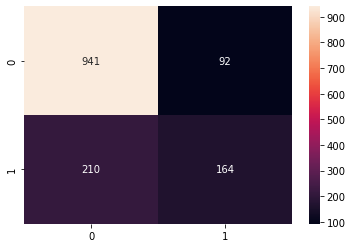

In [75]:
# Display the Confusion Matrix of the Support Vector
sns.heatmap(svCon , annot = True , fmt="g")
plt.show()

<b>Models Evaluation(without Handle Dataset & KFOLD)

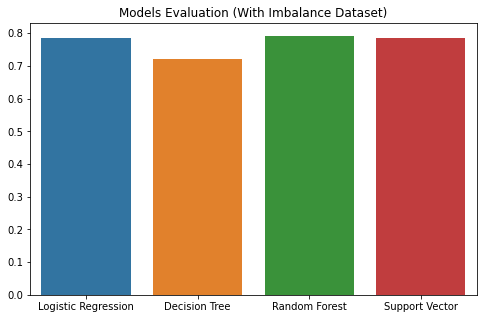

In [33]:
# Add the Accuracy of All Models in the List
accModel = [lrAcc , dtAcc , rdAcc , svAcc]
# Add the Name of the Models in the List
nameModel = ["Logistic Regression" , "Decision Tree" , "Random Forest" , "Support Vector"]

# Display the Model Evaluation with the Plot
plt.figure(figsize = (8,5))
sns.barplot(y = accModel , x =  nameModel)
plt.title("Models Evaluation (With Imbalance Dataset)")
plt.show()

# Handle Imblance Dataset / KFold Method

In [34]:
# Get the Total Count of Each Value of the Churn Column
classNo , classYes = dataset["Churn"].value_counts()

In [35]:
# Handle the Imbalance Dataset

smote = SMOTE(sampling_strategy = "minority") # Create the Object of SMOTE
xSm , ySm = smote.fit_resample(X,Y)

In [36]:
# Get the Count of Unique Values
values , counts = np.unique(ySm, return_counts=True)

# Display the Values and Counts
print(f"Here is the Values {values} & Counts {counts}")

Here is the Values [0 1] & Counts [5163 5163]


<b>Split the Handle Dataset into Training and Testing

In [37]:
# Split the Dataset with KFOLD
kfold = KFold(n_splits = 5 , shuffle=True)

<b>Machine Learning Models

In [38]:
# Define the Function of Cross Validation
def cross_validation(model , kfold = kfold , xSm = xSm , ySm = ySm):
    # Train the Model and get the Results
    results = cross_val_score(model , xSm , ySm , cv = kfold , scoring = "accuracy")
    
    # Return the Results
    return model , results

<b>Logistic Regression Model

In [39]:
# Create the Object of Logistic Regression
hlrModel = LogisticRegression()

# Call the Function and get the Accuracy Score
hlrModel , hlrAcc = cross_validation(hlrModel)

# Display the Accuracy of the Logistic Regression
print(f"Here is the Accuracy of the Logistic Regression Model : {hlrAcc.mean()}")

Here is the Accuracy of the Logistic Regression Model : 0.7777451603149341


<b>Decision Tree Classifier Model

In [40]:
# Create the Object of Decision Tree Classifier
hdtModel = DecisionTreeClassifier()

# Call the Function and get the Accuracy Score
hdtModel , hdtAcc = cross_validation(hdtModel)

# Display the Accuracy of the Decision Tree Classifier
print(f"Here is the Accuracy of the Decision Tree Classifier Model : {hdtAcc.mean()}")

Here is the Accuracy of the Decision Tree Classifier Model : 0.7844266564157617


<b>Random Forest Classifier Model

In [41]:
# Create the Object of Random Forest Classifier
hrfModel = RandomForestClassifier()

# Call the Function and get the Accuracy Score
hrfModel , hrfAcc = cross_validation(hrfModel)

# Display the Accuracy of the Random Forest Classifier
print(f"Here is the Accuracy of the Random Forest Classifier Model : {hrfAcc.mean()}")

Here is the Accuracy of the Random Forest Classifier Model : 0.8482465092621458


<b>Support Vector Classifier Model
    

In [42]:
# Create the Object of Support Vector Classifier
hsvModel = SVC()

# Call the Function and get the Accuracy Score
hsvModel , hsvAcc = cross_validation(hsvModel)

# Display the Accuracy of the Support Vector Classifier
print(f"Here is the Accuracy of the Support Vector Classifier Model : {hsvAcc.mean()}")

Here is the Accuracy of the Support Vector Classifier Model : 0.8034096603840808


<b>Model Evaluations(With Balance Dataset & KFOLD Method)

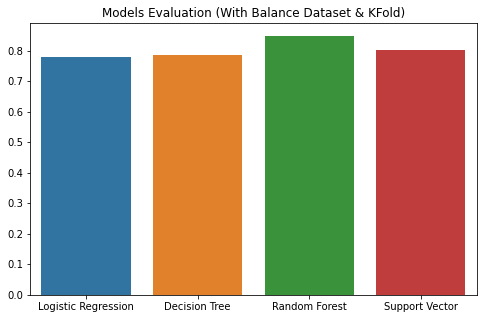

In [43]:
# Add the Accuracy of All Models in the List
accModel = [hlrAcc.mean() , hdtAcc.mean() , hrfAcc.mean() , hsvAcc.mean()]
# Add the Name of the Models in the List
nameModel = ["Logistic Regression" , "Decision Tree" , "Random Forest" , "Support Vector"]

# Display the Model Evaluation with the Plot
plt.figure(figsize = (8,5))
sns.barplot(y = accModel , x =  nameModel)
plt.title("Models Evaluation (With Balance Dataset & KFold)")
plt.show()


<b>Optimization - Hyper-Perameter Tuning 

<b>Logistic Regression Model

In [44]:
# Define the Parameters of the Logistic Regression
lr_param = {
   "penalty" : ['l1', 'l2'],
    "C": [0.01, 0.1, 1, 10, 100]
}

# Create the Object of GridSearchCV
gridLR = GridSearchCV(hlrModel , param_grid = lr_param , cv = kfold , verbose = 1)

# Now Fit the Grid Model in the Dataset
gridLR.fit(xSm , ySm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none'

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [78]:
# Display the Best Parameters of the Logistic Regression
print(f"Here is the Best Parameter of the Logistic Regression is : \n{gridLR.best_params_}\n")

# Display The Score of the Logistic Regression
print(f"Here is the Best Score of the Logistic Regression is : {gridLR.best_score_}")

Here is the Best Parameter of the Logistic Regression is : 
{'C': 1, 'penalty': 'l2'}

Here is the Best Score of the Logistic Regression is : 0.7770686943456727


<b>Decision Tree Classifer Model

In [46]:
# Define the Parameters of the Decision Tree Classifier
dt_param = {
    "criterion" : ["gini" , "entropy"],
    "max_depth" : [2,4,6,8,10,12],
    "min_samples_leaf" : [2,4,5,7,8],
    "min_samples_split" : [3,5,7,9]
}

# Create the Object of GridSearchCV
gridDT = GridSearchCV(hdtModel , param_grid = dt_param , cv = kfold , verbose = 1)

# Now Fit the Grid Model in the Dataset
gridDT.fit(xSm , ySm)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [2, 4, 5, 7, 8],
                         'min_samples_split': [3, 5, 7, 9]},
             verbose=1)

In [47]:
# Display the Best Parameters of the Decision Tree
print(f"Here is the Best Parameter of the Decision Tree is : \n{gridDT.best_params_}\n")

# Display The Score of the Decision Tree Model
print(f"Here is the Best Score of the Decision Tree is : {gridDT.best_score_}")

Here is the Best Parameter of the Decision Tree is : 
{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 9}

Here is the Best Score of the Decision Tree is : 0.8117379268638558


<b>Random Forest Classifer Model

In [48]:
# Define the Parameters of the Random Forest Classifier
rf_param = {
    "n_estimators" : [100,150],
    "criterion" : ["gini" , "entropy"],
    'max_features': ['auto', 'sqrt', 'log2'],
    "max_depth" : [2,4,6,8]
}

# Create the Object of GridSearchCV
gridRF = GridSearchCV(hrfModel , param_grid = rf_param , cv = kfold , verbose = 1)

# Now Fit the Grid Model in the Dataset
gridRF.fit(xSm , ySm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]},
             verbose=1)

In [49]:
# Display the Best Parameters of the Random Forest Classifier
print(f"Here is the Best Parameter of the Random Forest Classifier is : \n{gridRF.best_params_}\n")

# Display The Score of the Random Forest Classifier
print(f"Here is the Best Score of the Random Forest Classifier is : {gridRF.best_score_}")

Here is the Best Parameter of the Random Forest Classifier is : 
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 150}

Here is the Best Score of the Random Forest Classifier is : 0.8261692008747648


<b>Support Vector Machine Model

In [50]:
# Define the Parameters of the Support Vector Classifier
sv_param = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

# Create the Object of GridSearchCV
gridSV = GridSearchCV(hsvModel , param_grid = sv_param , cv = kfold , verbose = 1)

# Now Fit the Grid Model in the Dataset
gridSV.fit(xSm , ySm)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=1)

In [51]:
# Display the Best Parameters of the Support Vector Classifier
print(f"Here is the Best Parameter of the Support Vector Classifier is : \n{gridSV.best_params_}\n")

# Display The Score of the Support Vector Classifier
print(f"Here is the Best Score of the Support Vector Classifier is : {gridSV.best_score_}")

Here is the Best Parameter of the Support Vector Classifier is : 
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

Here is the Best Score of the Support Vector Classifier is : 0.8467942873081764


<b>Model Evaluations(After Hyper-Perameter Tuning)

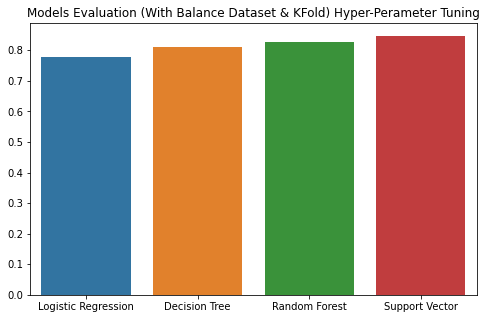

In [52]:
# Add the Accuracy of All Models in the List
accModel = [gridLR.best_score_ , gridDT.best_score_ , gridRF.best_score_ , gridSV.best_score_]
# Add the Name of the Models in the List
nameModel = ["Logistic Regression" , "Decision Tree" , "Random Forest" , "Support Vector"]

# Display the Model Evaluation with the Plot
plt.figure(figsize = (8,5))
sns.barplot(y = accModel , x =  nameModel)
plt.title("Models Evaluation (With Balance Dataset & KFold) Hyper-Perameter Tuning")
plt.show()